In [1]:
!pip install mindspore

In [2]:
import mindspore
print(mindspore.__version__)

2.7.1.post1


In [3]:
mindspore.run_check()
!pip install pandas

MindSpore version:  2.7.1.post1
The result of multiplication calculation is correct, MindSpore has been installed on platform [CPU] successfully!


In [35]:
import pandas as pd
import numpy as np
import mindspore as ms
from mindspore import nn, ops, Tensor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# =========================
# 1. Load and preprocess CSV
# =========================
csv_path = r"D:\data\format data1.csv"  # Replace with your CSV file path
df = pd.read_csv(csv_path)
any_missing = df.isnull().values.any()
print(f"\nAre there any missing values in the file? {any_missing}")

# Example: last column is the label
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode labels if categorical
if y.dtype == object or isinstance(y[0], str):
    le = LabelEncoder()
    y = le.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to MindSpore tensors
X_train = Tensor(X_train, ms.float32)
y_train = Tensor(y_train, ms.int32)
X_test = Tensor(X_test, ms.float32)
y_test = Tensor(y_test, ms.int32)

# =========================
# 2. Define Dataset Loader
# =========================
def create_dataset(X, y, batch_size=64, shuffle=True):
    dataset = ms.dataset.NumpySlicesDataset(
        {"features": X, "labels": y}, shuffle=shuffle
    )
    dataset = dataset.batch(batch_size)
    return dataset

train_dataset = create_dataset(X_train, y_train)
test_dataset = create_dataset(X_test, y_test, shuffle=False)
print('Data after split - Training set')
print('************************************\n')
print(X_train,y_train)
print('Data after split - Test set')
print('************************************\n')
print(X_test)
# =========================
# 3. Define Model (MLP)
# =========================
class CSVClassifier(nn.Cell):
    def __init__(self, input_dim, num_classes):
        super(CSVClassifier, self).__init__()
        self.fc = nn.SequentialCell([
            nn.Dense(input_dim, 64),
            nn.ReLU(),
            nn.Dense(64, 32),
            nn.ReLU(),
            nn.Dense(32, num_classes)
        ])

    def construct(self, x):
        return self.fc(x)

input_dim = X_train.shape[1]
num_classes = len(np.unique(y))
net = CSVClassifier(input_dim, num_classes)

# =========================
# 4. Loss, Optimizer, Metrics
# =========================
loss_fn = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')
optimizer = nn.Adam(net.trainable_params(), learning_rate=0.001)
metrics = {"Accuracy": nn.Accuracy()}

# =========================
# 5. Train the Model
# =========================
model = ms.Model(net, loss_fn=loss_fn, optimizer=optimizer, metrics=metrics)

print("Starting training...")
model.train(epoch=20, train_dataset=train_dataset, dataset_sink_mode=False)

# =========================
# 6. Evaluate the Model
# =========================
print("Evaluating...")
acc = model.eval(test_dataset, dataset_sink_mode=False)
print(f"Test Accuracy: {acc['Accuracy']:.4f}")



Are there any missing values in the file? False
Data after split - Training set
************************************

[[ 1.2050319   0.0227323  -1.6191916  ... -0.5275457  -0.44526622
  -0.08312483]
 [-0.2860413  -0.93460643 -0.40940017 ...  0.14659746 -0.468578
  -0.16829011]
 [ 1.5229142   1.1696444   1.0841227  ...  0.19967164  4.111256
  -1.173303  ]
 ...
 [ 0.14477316 -0.5271347  -0.15222709 ... -0.37705123  0.18155813
   1.3971719 ]
 [ 0.76056725 -0.6624148  -0.44759315 ... -0.77727187  1.2069145
  -0.5442911 ]
 [-1.1174072  -0.90859276 -1.4594264  ... -0.16802461 -0.7533931
  -0.54331553]] [1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0]
Data after split - Test set
************************************

[[-1.4029943  -0.68725014 -1.6192334  ... -0.9067225  -0.60853267
   0.17100896]
 [-0.384247

In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
print(pd.__version__)

2.3.3


In [34]:
import pandas as pd
import numpy as np
import mindspore as ms
from mindspore import nn, ops, Tensor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# =========================
# 1. Load and preprocess CSV
# =========================
csv_path = "D:/data/format data1.csv"  # Replace with your CSV file path
df = pd.read_csv(csv_path)

# Example: last column is the label
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode labels if categorical
if y.dtype == object or isinstance(y[0], str):
    le = LabelEncoder()
    y = le.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Convert to MindSpore tensors
X_train = Tensor(X_train, ms.float32)
y_train = Tensor(y_train, ms.int32)
X_test = Tensor(X_test, ms.float32)
y_test = Tensor(y_test, ms.int32)

# =========================
# 2. Define Dataset Loader
# =========================
def create_dataset(X, y, batch_size=32, shuffle=True):
    dataset = ms.dataset.NumpySlicesDataset(
        {"features": X, "labels": y}, shuffle=shuffle
    )
    dataset = dataset.batch(batch_size)
    return dataset

train_dataset = create_dataset(X_train, y_train)
test_dataset = create_dataset(X_test, y_test, shuffle=False)

# =========================
# 3. Define Model (MLP)
# =========================
class CSVClassifier(nn.Cell):
    def __init__(self, input_dim, num_classes):
        super(CSVClassifier, self).__init__()
        self.fc = nn.SequentialCell([
            nn.Dense(input_dim, 64),
            nn.ReLU(),
            nn.Dense(64, 32),
            nn.ReLU(),
            nn.Dense(32, num_classes)
        ])

    def construct(self, x):
        return self.fc(x)

input_dim = X_train.shape[1]
num_classes = len(np.unique(y))
net = CSVClassifier(input_dim, num_classes)

# =========================
# 4. Loss, Optimizer, Metrics
# =========================
loss_fn = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')
optimizer = nn.Adam(net.trainable_params(), learning_rate=0.001)
metrics = {"Accuracy": nn.Accuracy()}

# =========================
# 5. Train the Model
# =========================
model = ms.Model(net, loss_fn=loss_fn, optimizer=optimizer, metrics=metrics)

print("Starting training...")
model.train(epoch=20, train_dataset=train_dataset, dataset_sink_mode=False)

# =========================
# 6. Evaluate the Model
# =========================
print("Evaluating...")
acc = model.eval(test_dataset, dataset_sink_mode=False)
print(f"Test Accuracy: {acc['Accuracy']:.4f}")


Starting training...
Evaluating...
Test Accuracy: 0.7727


In [8]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import sklearn
print(sklearn.__version__)

1.7.2


In [10]:
import pandas as pd
import numpy as np
import mindspore as ms
from mindspore import nn, ops, Tensor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# =========================
# 1. Load and preprocess CSV
# =========================
csv_path = "D:/format data1.csv"  # Replace with your CSV file path
df = pd.read_csv(csv_path)

# Example: last column is the label
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode labels if categorical
if y.dtype == object or isinstance(y[0], str):
    le = LabelEncoder()
    y = le.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to MindSpore tensors
X_train = Tensor(X_train, ms.float32)
y_train = Tensor(y_train, ms.int32)
X_test = Tensor(X_test, ms.float32)
y_test = Tensor(y_test, ms.int32)

# =========================
# 2. Define Dataset Loader
# =========================
def create_dataset(X, y, batch_size=32, shuffle=True):
    dataset = ms.dataset.NumpySlicesDataset(
        {"features": X, "labels": y}, shuffle=shuffle
    )
    dataset = dataset.batch(batch_size)
    return dataset

train_dataset = create_dataset(X_train, y_train)
test_dataset = create_dataset(X_test, y_test, shuffle=False)

# =========================
# 3. Define Model (MLP)
# =========================
class CSVClassifier(nn.Cell):
    def __init__(self, input_dim, num_classes):
        super(CSVClassifier, self).__init__()
        self.fc = nn.SequentialCell([
            nn.Dense(input_dim, 64),
            nn.ReLU(),
            nn.Dense(64, 32),
            nn.ReLU(),
            nn.Dense(32, num_classes)
        ])

    def construct(self, x):
        return self.fc(x)

input_dim = X_train.shape[1]
num_classes = len(np.unique(y))
net = CSVClassifier(input_dim, num_classes)

# =========================
# 4. Loss, Optimizer, Metrics
# =========================
loss_fn = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')
optimizer = nn.Adam(net.trainable_params(), learning_rate=0.001)
metrics = {"Accuracy": nn.Accuracy()}

# =========================
# 5. Train the Model
# =========================
model = ms.Model(net, loss_fn=loss_fn, optimizer=optimizer, metrics=metrics)

print("Starting training...")
model.train(epoch=30, train_dataset=train_dataset, dataset_sink_mode=False)

# =========================
# 6. Evaluate the Model
# =========================
print("Evaluating...")
acc = model.eval(test_dataset, dataset_sink_mode=False)
print(f"Test Accuracy: {acc['Accuracy']:.4f}")


Starting training...
Evaluating...
Test Accuracy: 0.7000


In [11]:
pip install mindcv

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [13]:
import os
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\welcome


In [14]:
import mindcv

Original shape: (32, 32, 3)


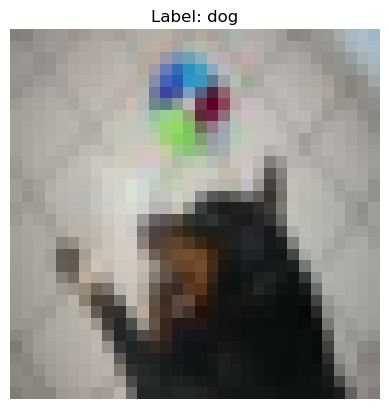

Original shape: (32, 32, 3)


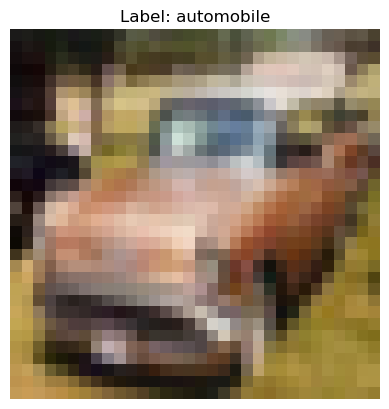

Original shape: (32, 32, 3)


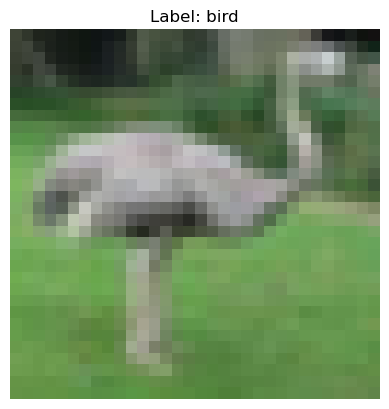

Original shape: (32, 32, 3)


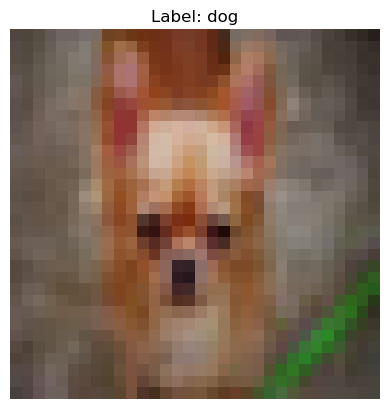

Original shape: (32, 32, 3)


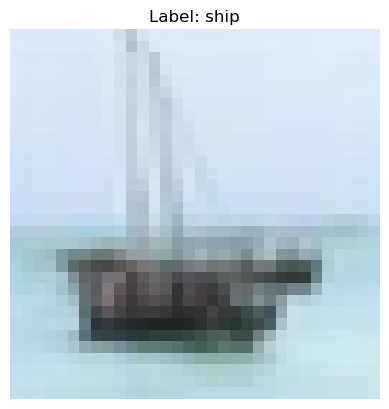

In [15]:
import mindcv
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
dataset = mindcv.create_dataset('cifar10', download=True)

# CIFAR-10 class names
cifar10_classes = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]

# Function to show a single image
def show_image(img_tensor, label):
    img = img_tensor.asnumpy()  # MindSpore Tensor -> NumPy
    
    # Check shape
    print("Original shape:", img.shape)

    # If shape is (H, C, W), convert to (H, W, C)
    if img.shape[1] == 3:  # likely (H, C, W)
        img = np.transpose(img, (0, 2, 1))
    
    plt.imshow(img.astype(np.uint8))
    plt.axis('off')
    plt.title(f"Label: {cifar10_classes[label]}")
    plt.show()

# Show first 5 images
for i, data in enumerate(dataset.create_dict_iterator()):
    show_image(data['image'], data['label'])
    if i >= 4:
        break


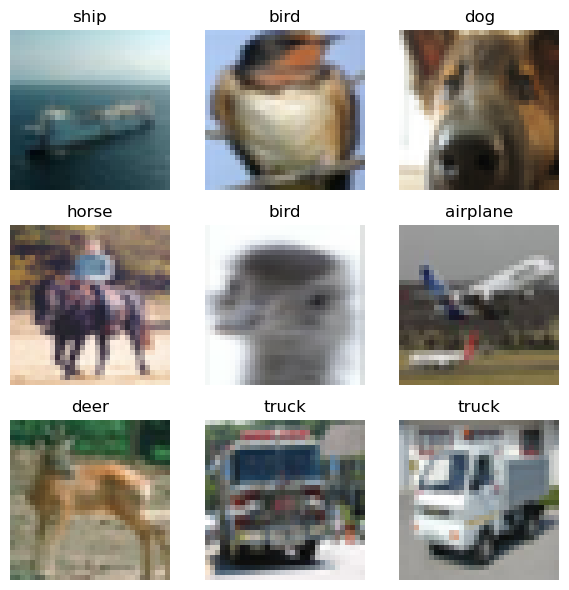

In [16]:
import mindcv
import matplotlib.pyplot as plt
import numpy as np

dataset = mindcv.create_dataset('cifar10', download=True)
cifar10_classes = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]

# Show 3x3 grid
fig, axes = plt.subplots(3,3, figsize=(6,6))
axes = axes.flatten()

for i, data in enumerate(dataset.create_dict_iterator()):
    if i >= 9:
        break
    img = data['image'].asnumpy()
    # Convert to HWC
    if img.shape[0] == 3:  # C,H,W
        img = np.transpose(img, (1,2,0))
    elif img.shape[1] == 3:  # H,C,W
        img = np.transpose(img, (0,2,1))
    axes[i].imshow(img.astype(np.uint8), interpolation='nearest')
    axes[i].axis('off')
    axes[i].set_title(cifar10_classes[data['label']])
plt.tight_layout()
plt.show()


In [17]:
import os
import mindspore.dataset as ds
from mindspore.dataset import vision
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Paths
# -----------------------------
train_root = r"D:\data\train"
val_root   = r"D:\data\val"

# Load datasets WITHOUT decoding
train_ds = ds.ImageFolderDataset(dataset_dir=train_root, shuffle=True, decode=False)
val_ds   = ds.ImageFolderDataset(dataset_dir=val_root, shuffle=False, decode=False)

# Detect class names
class_names = [d for d in os.listdir(train_root) if os.path.isdir(os.path.join(train_root,d))]
print("Detected classes:", class_names)

# -----------------------------
# Function to safely decode and visualize
# -----------------------------
def decode_and_show(img_tensor, label, title_prefix=""):
    try:
        # Convert MindSpore Tensor -> NumPy
        img_np = img_tensor.asnumpy()

        # Decode (img_np should be 1D for Decode)
        img = vision.Decode()(img_np)  # HWC

        # Convert grayscale to RGB if needed
        if img.shape[2] == 1:
            img = np.repeat(img, 3, axis=2)

        # Plot
        plt.imshow(img.astype(np.uint8))
        plt.axis('off')
        plt.title(f"{title_prefix} Label: {class_names[label]}")
        plt.show()

    except Exception as e:
        print("Error decoding image:", e)

# -----------------------------
# Show first 3 training images
# -----------------------------
#print("\n--- Sample Training Images ---")
#for i, data in enumerate(train_ds.create_dict_iterator()):
    #decode_and_show(data['image'], data['label'], title_prefix="Train")
    #if i >= 2:
     #   break

# -----------------------------
# Show first 3 validation images
# -----------------------------
#print("\n--- Sample Validation Images ---")
#for i, data in enumerate(val_ds.create_dict_iterator()):
 #   decode_and_show(data['image'], data['label'], title_prefix="Val")
  #  if i >= 2:
   #     break


Detected classes: ['autistic', 'non_autistic']


In [18]:
pip install mindspore mindcv scikit-learn pillow numpy

Note: you may need to restart the kernel to use updated packages.


In [19]:
# ===============================
# 1. IMPORTS
# ===============================
import os
import shutil
import numpy as np
from PIL import Image

import mindspore as ms
from mindspore import nn, Tensor

from mindcv import create_model

import mindspore.dataset.vision as vision
import mindspore.dataset.transforms as transforms

from sklearn.cluster import KMeans


# ===============================
# 2. MINDSpore CONTEXT
# ===============================
ms.set_context(mode=ms.GRAPH_MODE, device_target="CPU")


# ===============================
# 3. LOAD PRETRAINED MODEL
# ===============================
model = create_model(
    model_name="resnet50",
    pretrained=True
)

# REMOVE CLASSIFICATION HEAD (FIXED)
cells = list(model.cells())
model = nn.SequentialCell(cells[:-1])
model.set_train(False)


# ===============================
# 4. IMAGE TRANSFORM (VERSION-SAFE)
# ===============================
transform = transforms.Compose([
    vision.Resize((224, 224)),
    vision.Rescale(1.0 / 255.0, 0.0),
    vision.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
    vision.HWC2CHW()
])


def load_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img = transform(img)

    # Convert to MindSpore tensor
    img = Tensor(img)

    # Ensure shape is [1, C, H, W]
    if len(img.shape) == 3:      # [C, H, W]
        img = img.expand_dims(0)

    return img

img = load_image("C:/Users/welcome/OneDrive - Bahrain Polytechnic/HoS/2025-2026/huawei teacher comp/data/Autistic.0.jpg")
print("Input shape:", img.shape)


# ===============================
# 5. FEATURE EXTRACTION
# ===============================
IMAGE_DIR = "C:/Users/welcome/OneDrive - Bahrain Polytechnic/HoS/2025-2026/huawei teacher comp/data/"

features = []
image_names = []

for img_name in os.listdir(IMAGE_DIR):
    img_path = os.path.join(IMAGE_DIR, img_name)

    img = load_image(img_path)
    embedding = model(img)                 # Forward pass
    embedding = embedding.asnumpy().reshape(-1)  # Flatten

    features.append(embedding)
    image_names.append(img_name)

features = np.array(features)
print("Feature shape:", features.shape)


# ===============================
# 6. FEATURE NORMALIZATION
# ===============================
features = features / np.linalg.norm(features, axis=1, keepdims=True)


# ===============================
# 7. K-MEANS CLUSTERING
# ===============================
kmeans = KMeans(
    n_clusters=2,     # autistic vs non-autistic
    random_state=42
)

labels = kmeans.fit_predict(features)


# ===============================
# 8. SAVE CLUSTERED IMAGES
# ===============================
OUTPUT_DIR = "cluster_results"
os.makedirs(OUTPUT_DIR, exist_ok=True)

for i in range(2):
    os.makedirs(os.path.join(OUTPUT_DIR, f"cluster_{i}"), exist_ok=True)

for img_name, label in zip(image_names, labels):
    src = os.path.join(IMAGE_DIR, img_name)
    dst = os.path.join(OUTPUT_DIR, f"cluster_{label}", img_name)
    shutil.copy(src, dst)


# ===============================
# 9. PRINT CLUSTER CONTENTS
# ===============================
for i in range(2):
    print(f"\nCluster {i}:")
    for img, label in zip(image_names, labels):
        if label == i:
            print(" ", img)


[WARNING] ME(17952:4516,MainProcess):2026-01-12-23:17:11.122.000 [mindspore\context.py:1334] For 'context.set_context', the parameter 'device_target' will be deprecated and removed in a future version. Please use the api mindspore.set_device() instead.


Input shape: (1, 3, 224, 224)
Feature shape: (10, 2048)

Cluster 0:
  Autistic.3.jpg
  Autistic.4.jpg
  Non_Autistic.0.jpg

Cluster 1:
  Autistic.0.jpg
  Autistic.1.jpg
  Autistic.2.jpg
  Non_Autistic.1.jpg
  Non_Autistic.2.jpg
  Non_Autistic.3.jpg
  Non_Autistic.4.jpg


C:\Users\welcome\miniconda3\envs\ms_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
import mindspore
import mindcv
print(mindspore.__version__)


2.7.1.post1


In [21]:
import os

print(os.path.exists("C:/Users/welcome/OneDrive - Bahrain Polytechnic/HoS/2025-2026/huawei teacher comp/dataset/train"))
print(os.path.exists("C:/Users/welcome/OneDrive - Bahrain Polytechnic/HoS/2025-2026/huawei teacher comp/dataset/val"))
print(os.path.exists("C:/Users/welcome/OneDrive - Bahrain Polytechnic/HoS/2025-2026/huawei teacher comp/dataset/train/Autistic"))

True
True
True


In [22]:
import os

train_root = r"D:\data\train"

class_names = [d for d in os.listdir(train_root) if os.path.isdir(os.path.join(train_root, d))]
class_to_label = {name: idx for idx, name in enumerate(class_names)}

print("Detected classes:", class_to_label)
# Output should be: {'autistic': 0, 'non_autistic': 1}


Detected classes: {'autistic': 0, 'non_autistic': 1}


In [23]:
from PIL import Image
import os

def remove_bad_images(root):
    """Remove images that are not 3-channel RGB."""
    total = 0
    removed = 0
    for cls in os.listdir(root):
        cls_path = os.path.join(root, cls)
        if not os.path.isdir(cls_path):
            continue
        for f in os.listdir(cls_path):
            path = os.path.join(cls_path, f)
            if not f.lower().endswith(('.jpg', '.jpeg', '.png')):
                os.remove(path)
                removed += 1
                continue
            try:
                img = Image.open(path)
                img = img.convert('RGB')  # ensure RGB
                if img.size[0] == 0 or img.size[1] == 0:
                    os.remove(path)
                    removed += 1
                else:
                    total += 1
            except:
                os.remove(path)
                removed += 1
    print(f"Total valid images: {total}, Removed: {removed}")

# Run on train and val folders
remove_bad_images(r"D:\data\train")
remove_bad_images(r"D:\data\val")


Total valid images: 10, Removed: 0
Total valid images: 5, Removed: 0


In [24]:
# ===========================
# MindSpore 2.7 - ResNet18 Training
# Autistic vs Non-Autistic Classifier
# ===========================

import os
import mindspore as ms
from mindspore import nn, Tensor
from mindspore.dataset import ImageFolderDataset, vision
from mindcv.models import resnet18

# -----------------------------
# 1️⃣ Paths & Hyperparameters
# -----------------------------
train_root = r"D:\data\train"
val_root   = r"D:\data\val"

batch_size = 8
num_epochs = 5
learning_rate = 0.0001

# -----------------------------
# 2️⃣ Detect classes automatically
# -----------------------------
class_names = [d for d in os.listdir(train_root) if os.path.isdir(os.path.join(train_root,d))]
class_to_label = {name: idx for idx, name in enumerate(class_names)}
num_classes = len(class_names)
print(f"Detected classes: {class_to_label}")

# -----------------------------
# 3️⃣ Create ImageFolderDataset
# -----------------------------
train_ds = ImageFolderDataset(dataset_dir=train_root, shuffle=True)
val_ds   = ImageFolderDataset(dataset_dir=val_root, shuffle=False)

# -----------------------------
# 4️⃣ Safe image preprocessing
# -----------------------------
def safe_transform(image):
    # Decode image bytes (returns NumPy array in MS 2.7)
    img = vision.Decode()(image)
    # Resize to 224x224
    img = vision.Resize((224,224))(img)
    # Convert HWC -> CHW
    img = vision.HWC2CHW()(img)
    # Convert to Tensor(float32)
    img = Tensor(img, ms.float32)
    # Manual normalize
    mean = Tensor([0.485,0.456,0.406]).reshape(3,1,1)
    std  = Tensor([0.229,0.224,0.225]).reshape(3,1,1)
    img = (img / 255.0 - mean) / std
    return img

# Apply transform and batch
train_ds = train_ds.map(operations=safe_transform, input_columns="image").batch(batch_size)
val_ds   = val_ds.map(operations=safe_transform, input_columns="image").batch(batch_size)

# -----------------------------
# 5️⃣ Load pretrained ResNet18
# -----------------------------
ms_model = resnet18(pretrained=True, num_classes=num_classes)

# -----------------------------
# 6️⃣ Loss & Optimizer
# -----------------------------
loss_fn = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')
optimizer = nn.Adam(ms_model.trainable_params(), learning_rate=learning_rate)

# -----------------------------
# 7️⃣ TrainOneStepCell & Model for eval
# -----------------------------
train_network = nn.TrainOneStepCell(nn.WithLossCell(ms_model, loss_fn), optimizer)
train_network.set_train()

model = ms.Model(ms_model, loss_fn=loss_fn, metrics={"accuracy"})

# -----------------------------
# 8️⃣ Training Loop
# -----------------------------
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    total_loss = 0.0
    steps = 0

    for images, labels in train_ds.create_tuple_iterator():
        loss = train_network(images, labels)
        total_loss += loss.asnumpy()
        steps += 1

    if steps == 0:
        raise RuntimeError("Training dataset is empty! Check dataset paths and subfolders.")

    avg_loss = total_loss / steps
    print(f"  Training loss: {avg_loss:.4f}")

    # Validation
    val_metrics = model.eval(val_ds)
    val_acc = val_metrics.get("accuracy", 0)
    print(f"  Validation accuracy: {val_acc:.4f}")

print("\n✅ Training completed successfully!")


Detected classes: {'autistic': 0, 'non_autistic': 1}


[WARNING] ME(17952:4516,MainProcess):2026-01-12-23:17:21.183.000 [mindspore\train\serialization.py:1763] For 'load_param_into_net', 2 parameters in the 'net' are not loaded, because they are not in the 'parameter_dict', please check whether the network structure is consistent when training and loading checkpoint.
[WARNING] ME(17952:4516,MainProcess):2026-01-12-23:17:21.185.000 [mindspore\train\serialization.py:1767] ['classifier.weight', 'classifier.bias'] are not loaded.



Epoch 1/5
  Training loss: 0.7200
  Validation accuracy: 0.4000

Epoch 2/5
  Training loss: 0.0118
  Validation accuracy: 0.8000

Epoch 3/5
  Training loss: 0.0025
  Validation accuracy: 0.8000

Epoch 4/5
  Training loss: 0.0010
  Validation accuracy: 1.0000

Epoch 5/5
  Training loss: 0.0009
  Validation accuracy: 1.0000

✅ Training completed successfully!


In [25]:
# ===========================
# MindSpore 2.7 - Optimized ResNet18 Training
# Freeze backbone, train classifier only
# ===========================

import os
import mindspore as ms
from mindspore import nn, Tensor
from mindspore.dataset import ImageFolderDataset, vision
from mindcv.models import resnet18

# -----------------------------
# 1️⃣ Paths & Hyperparameters
# -----------------------------
train_root = r"D:\data\train"
val_root   = r"D:\data\val"

batch_size = 8
num_epochs = 5
learning_rate = 0.0001

# -----------------------------
# 2️⃣ Detect classes automatically
# -----------------------------
class_names = [d for d in os.listdir(train_root) if os.path.isdir(os.path.join(train_root,d))]
class_to_label = {name: idx for idx, name in enumerate(class_names)}
num_classes = len(class_names)
print(f"Detected classes: {class_to_label}")

# -----------------------------
# 3️⃣ Create ImageFolderDataset
# -----------------------------
train_ds = ImageFolderDataset(dataset_dir=train_root, shuffle=True)
val_ds   = ImageFolderDataset(dataset_dir=val_root, shuffle=False)

# -----------------------------
# 4️⃣ Safe image preprocessing
# -----------------------------
def safe_transform(image):
    # Decode image bytes to NumPy array
    img = vision.Decode()(image)       # NumPy array in MS 2.7
    img = vision.Resize((224,224))(img)
    img = vision.HWC2CHW()(img)       # HWC -> CHW
    img = Tensor(img, ms.float32)
    # Manual normalization
    mean = Tensor([0.485,0.456,0.406]).reshape(3,1,1)
    std  = Tensor([0.229,0.224,0.225]).reshape(3,1,1)
    img = (img / 255.0 - mean) / std
    return img

# Apply transform and batch
train_ds = train_ds.map(operations=safe_transform, input_columns="image").batch(batch_size)
val_ds   = val_ds.map(operations=safe_transform, input_columns="image").batch(batch_size)

# -----------------------------
# 5️⃣ Load pretrained ResNet18
# -----------------------------
ms_model = resnet18(pretrained=True, num_classes=num_classes)

# -----------------------------
# 6️⃣ Freeze backbone parameters
# -----------------------------
for param in ms_model.trainable_params():
    if "classifier" not in param.name:   # Only classifier layer is trainable
        param.requires_grad = False

# -----------------------------
# 7️⃣ Loss & Optimizer
# -----------------------------
loss_fn = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')
optimizer = nn.Adam(ms_model.trainable_params(), learning_rate=learning_rate)

# -----------------------------
# 8️⃣ TrainOneStepCell & Model for eval
# -----------------------------
train_network = nn.TrainOneStepCell(nn.WithLossCell(ms_model, loss_fn), optimizer)
train_network.set_train()

model = ms.Model(ms_model, loss_fn=loss_fn, metrics={"accuracy"})

# -----------------------------
# 9️⃣ Training Loop
# -----------------------------
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    total_loss = 0.0
    steps = 0

    for images, labels in train_ds.create_tuple_iterator():
        loss = train_network(images, labels)
        total_loss += loss.asnumpy()
        steps += 1

    if steps == 0:
        raise RuntimeError("Training dataset is empty! Check dataset paths and subfolders.")

    avg_loss = total_loss / steps
    print(f"  Training loss: {avg_loss:.4f}")

    # Validation
    val_metrics = model.eval(val_ds)
    val_acc = val_metrics.get("accuracy", 0)
    print(f"  Validation accuracy: {val_acc:.4f}")

print("\n✅ Optimized training completed successfully!")


Detected classes: {'autistic': 0, 'non_autistic': 1}


[WARNING] ME(17952:4516,MainProcess):2026-01-12-23:17:49.397.000 [mindspore\train\serialization.py:1763] For 'load_param_into_net', 2 parameters in the 'net' are not loaded, because they are not in the 'parameter_dict', please check whether the network structure is consistent when training and loading checkpoint.
[WARNING] ME(17952:4516,MainProcess):2026-01-12-23:17:49.397.000 [mindspore\train\serialization.py:1767] ['classifier.weight', 'classifier.bias'] are not loaded.



Epoch 1/5
  Training loss: 0.7550
  Validation accuracy: 0.4000

Epoch 2/5
  Training loss: 0.7331
  Validation accuracy: 0.6000

Epoch 3/5
  Training loss: 0.7787
  Validation accuracy: 0.6000

Epoch 4/5
  Training loss: 0.8216
  Validation accuracy: 0.8000

Epoch 5/5
  Training loss: 0.7643
  Validation accuracy: 0.8000

✅ Optimized training completed successfully!


Detected classes: ['autistic', 'non_autistic']


[WARNING] ME(17952:4516,MainProcess):2026-01-12-23:18:08.866.000 [mindspore\train\serialization.py:1763] For 'load_param_into_net', 2 parameters in the 'net' are not loaded, because they are not in the 'parameter_dict', please check whether the network structure is consistent when training and loading checkpoint.
[WARNING] ME(17952:4516,MainProcess):2026-01-12-23:18:08.867.000 [mindspore\train\serialization.py:1767] ['classifier.weight', 'classifier.bias'] are not loaded.



Epoch 1/5
  Loss      : 0.6670
  Accuracy  : 0.6000
  Precision : 0.5833
  Recall    : 0.5833
  F1-score  : 0.5833

Epoch 2/5
  Loss      : 1.0074
  Accuracy  : 0.6000
  Precision : 0.5833
  Recall    : 0.5833
  F1-score  : 0.5833

Epoch 3/5
  Loss      : 0.9879
  Accuracy  : 0.6000
  Precision : 0.5833
  Recall    : 0.5833
  F1-score  : 0.5833

Epoch 4/5
  Loss      : 0.6477
  Accuracy  : 0.6000
  Precision : 0.5833
  Recall    : 0.5833
  F1-score  : 0.5833

Epoch 5/5
  Loss      : 0.9604
  Accuracy  : 0.6000
  Precision : 0.5833
  Recall    : 0.5833
  F1-score  : 0.5833

✅ Training finished successfully!


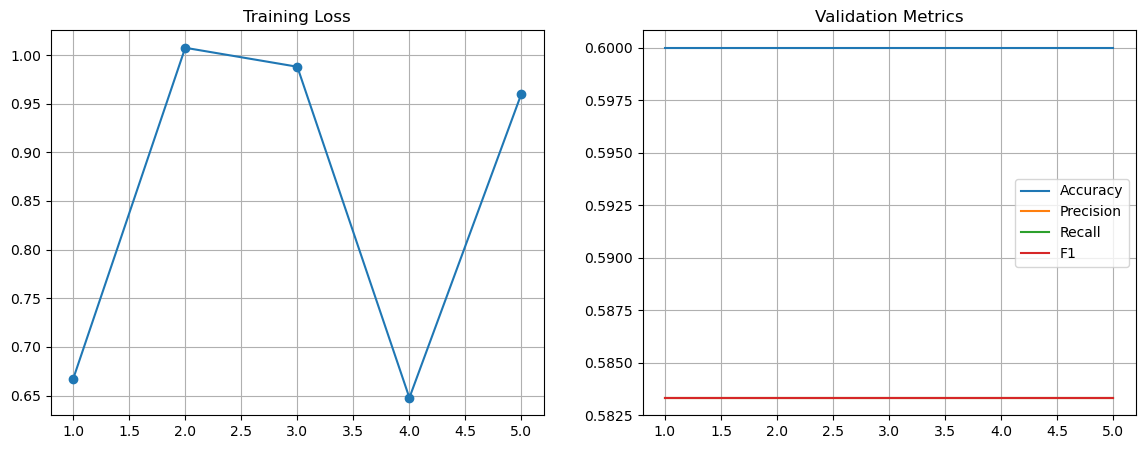

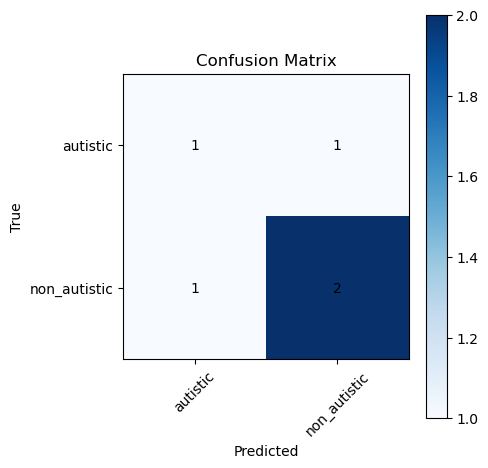

In [26]:
# ============================================================
# MindSpore 2.7 - ResNet18 Transfer Learning (SAFE VERSION)
# ============================================================

import os
import numpy as np
import mindspore as ms
from mindspore import nn, Tensor
from mindspore.dataset import ImageFolderDataset, vision
from mindcv.models import resnet18

import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict

ms.set_context(mode=ms.PYNATIVE_MODE)

# ------------------------------------------------------------
# 1️⃣ Paths & Hyperparameters
# ------------------------------------------------------------
train_root = r"D:\data\train"
val_root   = r"D:\data\val"

batch_size = 8
num_epochs = 5
learning_rate = 1e-4

# ------------------------------------------------------------
# 2️⃣ Auto-detect Classes
# ------------------------------------------------------------
class_names = sorted([
    d for d in os.listdir(train_root)
    if os.path.isdir(os.path.join(train_root, d))
])

num_classes = len(class_names)
print("Detected classes:", class_names)

# ------------------------------------------------------------
# 3️⃣ Dataset Creation (DECODE ONCE)
# ------------------------------------------------------------
train_ds = ImageFolderDataset(
    train_root,
    shuffle=True,
    decode=True,
    num_parallel_workers=4
)

val_ds = ImageFolderDataset(
    val_root,
    shuffle=False,
    decode=True,
    num_parallel_workers=4
)

# ------------------------------------------------------------
# 4️⃣ SAFE Image Transform (NO Decode, NO Errors)
# ------------------------------------------------------------
def safe_transform(image):
    # image: NumPy array, uint8, HWC
    image = vision.Resize((224, 224))(image)
    image = vision.HWC2CHW()(image)
    image = image.astype(np.float32) / 255.0

    mean = np.array([0.485, 0.456, 0.406]).reshape(3,1,1)
    std  = np.array([0.229, 0.224, 0.225]).reshape(3,1,1)

    image = (image - mean) / std
    return image

train_ds = train_ds.map(
    operations=safe_transform,
    input_columns="image"
).batch(batch_size)

val_ds = val_ds.map(
    operations=safe_transform,
    input_columns="image"
).batch(batch_size)

# ------------------------------------------------------------
# 5️⃣ Load Pretrained ResNet18
# ------------------------------------------------------------
network = resnet18(pretrained=True, num_classes=num_classes)

# ------------------------------------------------------------
# 6️⃣ Freeze Backbone
# ------------------------------------------------------------
for param in network.trainable_params():
    if "classifier" not in param.name:
        param.requires_grad = False

# ------------------------------------------------------------
# 7️⃣ Loss & Optimizer
# ------------------------------------------------------------
loss_fn = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction="mean")
optimizer = nn.Adam(network.trainable_params(), learning_rate=learning_rate)

# ------------------------------------------------------------
# 8️⃣ Train Wrapper
# ------------------------------------------------------------
train_step = nn.TrainOneStepCell(
    nn.WithLossCell(network, loss_fn),
    optimizer
)
train_step.set_train()

# ------------------------------------------------------------
# 9️⃣ Metric Utilities
# ------------------------------------------------------------
def compute_metrics(y_true, y_pred, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[t, p] += 1

    acc = np.trace(cm) / np.sum(cm)

    precision, recall, f1 = [], [], []
    for i in range(num_classes):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp

        p = tp / (tp + fp + 1e-8)
        r = tp / (tp + fn + 1e-8)
        f = 2 * p * r / (p + r + 1e-8)

        precision.append(p)
        recall.append(r)
        f1.append(f)

    return {
        "accuracy": acc,
        "precision": np.mean(precision),
        "recall": np.mean(recall),
        "f1": np.mean(f1),
        "confusion_matrix": cm
    }

# ------------------------------------------------------------
# 🔟 Training Loop
# ------------------------------------------------------------
history = defaultdict(list)

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    network.set_train(True)

    total_loss, steps = 0.0, 0

    for images, labels in train_ds.create_tuple_iterator():
        images = Tensor(images, ms.float32)
        loss = train_step(images, labels)
        total_loss += loss.asnumpy()
        steps += 1

    avg_loss = total_loss / steps
    history["train_loss"].append(avg_loss)

    # ---------------- Validation ----------------
    network.set_train(False)
    y_true, y_pred = [], []

    for images, labels in val_ds.create_tuple_iterator():
        images = Tensor(images, ms.float32)
        logits = network(images)
        preds = logits.argmax(axis=1)

        y_true.extend(labels.asnumpy())
        y_pred.extend(preds.asnumpy())

    metrics = compute_metrics(y_true, y_pred, num_classes)

    history["val_accuracy"].append(metrics["accuracy"])
    history["val_precision"].append(metrics["precision"])
    history["val_recall"].append(metrics["recall"])
    history["val_f1"].append(metrics["f1"])

    print(f"  Loss      : {avg_loss:.4f}")
    print(f"  Accuracy  : {metrics['accuracy']:.4f}")
    print(f"  Precision : {metrics['precision']:.4f}")
    print(f"  Recall    : {metrics['recall']:.4f}")
    print(f"  F1-score  : {metrics['f1']:.4f}")

print("\n✅ Training finished successfully!")

# ------------------------------------------------------------
# 1️⃣1️⃣ Training Curves
# ------------------------------------------------------------
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(epochs, history["train_loss"], marker="o")
plt.title("Training Loss")
plt.grid()

plt.subplot(1,2,2)
plt.plot(epochs, history["val_accuracy"], label="Accuracy")
plt.plot(epochs, history["val_precision"], label="Precision")
plt.plot(epochs, history["val_recall"], label="Recall")
plt.plot(epochs, history["val_f1"], label="F1")
plt.legend()
plt.title("Validation Metrics")
plt.grid()
plt.show()

# ------------------------------------------------------------
# 1️⃣2️⃣ Confusion Matrix
# ------------------------------------------------------------
cm = metrics["confusion_matrix"]

plt.figure(figsize=(5,5))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()

plt.xticks(range(num_classes), class_names, rotation=45)
plt.yticks(range(num_classes), class_names)

for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 1️⃣3️⃣ Single Image Prediction
# ------------------------------------------------------------
def predict_image(image_path):
    network.set_train(False)

    img = Image.open(image_path).convert("RGB")
    img = img.resize((224,224))
    img = np.array(img).astype(np.float32) / 255.0
    img = img.transpose(2,0,1)

    mean = np.array([0.485,0.456,0.406]).reshape(3,1,1)
    std  = np.array([0.229,0.224,0.225]).reshape(3,1,1)
    img = (img - mean) / std

    img_tensor = Tensor(img).expand_dims(0)

    logits = network(img_tensor)
    probs = ms.ops.Softmax()(logits)

    pred = probs.argmax(axis=1).asnumpy()[0]
    conf = probs.max().asnumpy()

    plt.imshow(Image.open(image_path))
    plt.axis("off")
    plt.title(f"Prediction: {class_names[pred]} ({conf:.2%})")
    plt.show()

# Example:
# predict_image(r"D:\data\test\example.jpg")
